# Last Significant Bit (LSB)

Implementation of Last Significant Bit method on grayscale image. help(LSB) for more detail about LSB module or read the LSB.py file

## 1. Use File Image as Data

### 1.1 Embed Data on Image
Embed image 'red.png' with resolution [100,100] to image 'graybird.png' with resolution [300,200]. Result an image grayscale with resolution [300,200] and save it to 'gray1.png'. Before image data embeded to image target, image data will be convert to grayscale

In [1]:
import LSB as lsb
import PIL.Image as image

# Initialize image target, image data, and lenght of lsb
img_filename = 'graybird.png'
img_data_filename = 'red.png'
img_result_filename = 'gray1.png'
img_height = image.open(img_filename).height
img_width = image.open(img_filename).width
img_data_height = image.open(img_data_filename).height
img_data_widht = image.open(img_data_filename).width
len_of_lsb = 4

Display image target (before embeding)

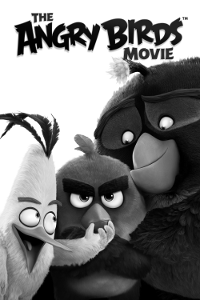

In [2]:
image.open(img_filename)

Display the image data

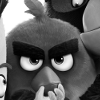

In [3]:
image.open(img_data_filename)

Embed image data to image target

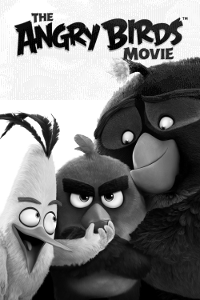

In [4]:
# Convert Image and Image Data to list <string> of binnary
list_bin_of_img = lsb.img2list_bin(img_filename)
list_bin_of_data = lsb.sliced(lsb.img2str(img_data_filename),len_of_lsb)
# Embed List LSB to List binnary of image, return list <int>
new_list_img = lsb.stego(list_bin_of_img, list_bin_of_data)
# Convert list <int> to list <string> binnary
new_list_bin = lsb.list2bin(new_list_img)

img_result = lsb.list2img(new_list_bin, [img_height, img_width])
img_result.save(img_result_filename)
img_result


### 1.2 Exstract Data from Image
Actually in LSB method we don't need the image data file if we'll extract from the image target, but in this example we use the image data to get resulution of image data because function list2img(list, [height, width]) need [height, width] of image we'll create

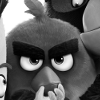

In [5]:
import LSB as lsb

img_filename = 'graybird.png'
img_data_filename = 'red.png'
img_result_filename = 'gray1.png'
img_height = image.open(img_filename).height
img_width = image.open(img_filename).width
img_data_height = image.open(img_data_filename).height
img_data_widht = image.open(img_data_filename).width
len_of_lsb = 4

list_lsb = lsb.lsb_from_image(img_result_filename, len_of_lsb)
# show list_lsb as image
lsb_img = lsb.list2img(list_lsb, [img_data_height, img_data_widht])
lsb_img 

if we create image from lsb_list with different [height, width], we'll get different result. or maybe error because index out of bound

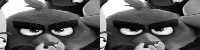

In [6]:
res = lsb.list2img(list_lsb, [50, 200])
res 


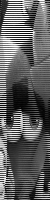

In [7]:
res = lsb.list2img(list_lsb, [200, 50])
res 

## 2. Use File Text as Data

### 2.1 Embed File Text to Image
We'll embed file text to image by:
- read file text and convert it to a string
- make list of binary from the string
- slice lenght of each element of list to lenght lsb we want
- embed the list to image 

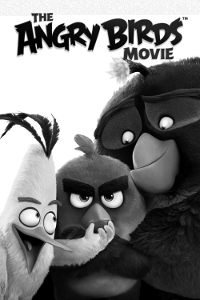

In [17]:
img_filename = 'graybird.png'
img_result_filename = 'gray2.png'
img_height = image.open(img_filename).height
img_width = image.open(img_filename).width
len_of_lsb = 4
text_filename = 'LICENSE.txt'

text = open(text_filename,"r").read()
ls = lsb.str2list_bin(text)
new_s = lsb.list2str(ls)
lb = lsb.sliced(new_s,len_of_lsb)

# Convert Image to list <string> of binnary
list_bin_of_img = lsb.img2list_bin(img_filename)
list_bin_of_data = lb
# Embed List LSB to List binnary of image, return list <int>
new_list_img = lsb.stego(list_bin_of_img, list_bin_of_data)
# Convert list <int> to list <string> binnary
new_list_bin = lsb.list2bin(new_list_img)

img_result = lsb.list2img(new_list_bin, [img_height, img_width])
img_result.save(img_result_filename)
img_result

### 2.2 Exstract Data from Image
Before we extract data text from image we must nkow how many data (characters) have embede on the image. If we just get all lsb from each pixel on image and convert it to text, may be we get more text or different from the original text we embeded. To get number of characters in the text you can use 

len(open(file_name,"r").read())

In [2]:
import LSB as lsb

img_result_filename = 'gray2.png'
len_of_lsb = 4
# we use 1520 because we know the number of character we'll exstract
# different file text may have different number of characters, run len(open(file_name,"r").read()) to get number of character of file text
number_of_characters = 1520

list_lsb = lsb.lsb_from_image(img_result_filename, len_of_lsb)

Lenght of each element in list_lsb equals to lenght_lsb we have define, the lenght may not 8 so we neet to make the lenght of each element to 8, by make it to a string and sliced to lenght=8 of each element

In [4]:
s = lsb.sliced(lsb.list2str(list_lsb), 8)

result = lsb.list_bin2str(s[:number_of_characters])
print(result)

BSD 3-Clause License

Copyright (c) 2020, Dir Sulaiman
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAI

Save the string to file

In [ ]:
# if the file doesn't exist, create new file. else replace the contents of file
filename = 'result.txt'
lsb.str2file(filename, result)